<a href="https://www.kaggle.com/code/sahilr05/indians-diabetes?scriptVersionId=106944602" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Glucose, BloodPressure, SkinThickness, Insulin, BMI -  is never 0 so that is outliers 
- Remove Outliers

**Data Understand**

In [5]:
# DiabetesPedigreeFunction = indicates the function which scores likelihood of diabetes based on family history
# Glucose        = minimum level is 100 & max 200
# BloodPressure  = minimum level is 90 & max 140
# SkinThickness  = 2.25-17.85 mm in males & 4.90-21.00 mm in females
# Insulin        = minimum level is 18 & max 276 mIU/L
# BMI        
#     - between 18.5 and 24.9 – you're in the healthy weight
#     - between 25 and 29.9 – you're in the overweight
#     - 30 and 39.9 – you're in the obese

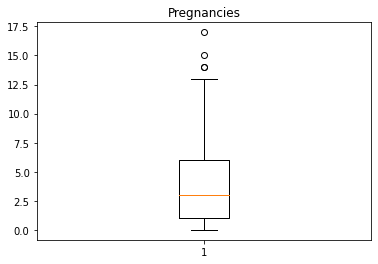

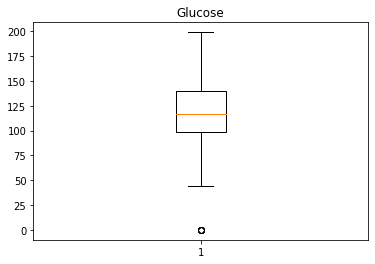

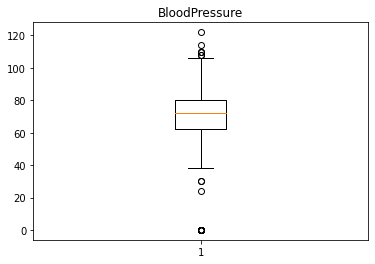

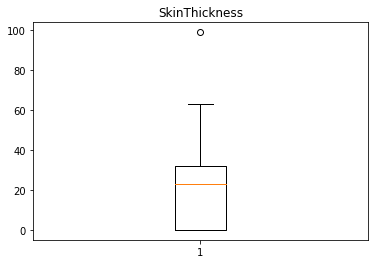

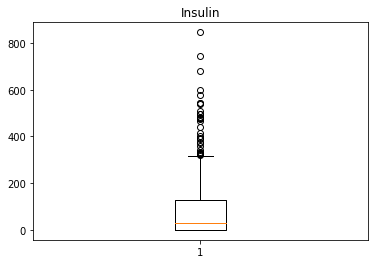

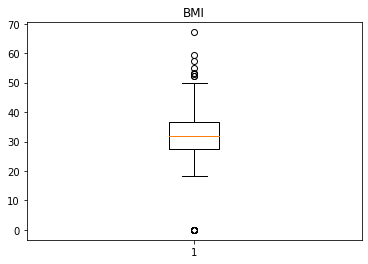

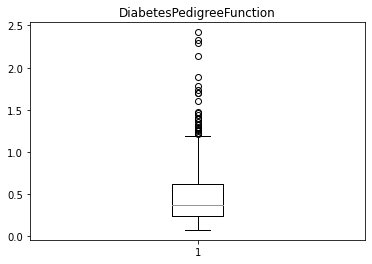

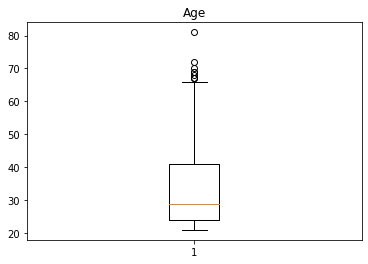

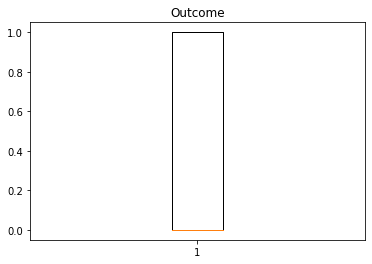

In [6]:
for i in data.columns:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [7]:
from scipy import stats
# data["Glucose"]
z = np.abs(stats.zscore(data["Glucose"]))
print(np.where(z > 3))

(array([ 75, 182, 342, 349, 502]),)


In [8]:
# # IQR
# def stdData(data):
#     q1 = np.percentile(data,25)
#     q3 = np.percentile(data,75)
#     IQR = q3 - q1
#     lower = np.where(data <= (q1-1.5*IQR))
#     upper = np.where(data >= (q3+1.5*IQR))
#     return lower , upper

# lower, upper = stdData(data["Glucose"])
# data.drop(lower[0],inplace=True,errors="ignore")

# lower, upper = stdData(data["BloodPressure"])
# data.drop(lower[0],inplace=True,errors="ignore")
# data.drop(upper[0],inplace=True,errors="ignore")

# lower, upper = stdData(data["SkinThickness"])
# data.drop(lower[0],inplace=True,errors="ignore")
# data.drop(upper[0],inplace=True,errors="ignore")

# lower, upper = stdData(data["Insulin"])
# data.drop(lower[0],inplace=True,errors="ignore")
# data.drop(upper[0],inplace=True,errors="ignore")

In [9]:
data = data[data["Glucose"]>100]
data = data[data["BloodPressure"]>60]
data = data[data["SkinThickness"]<80]
data = data[data["BMI"]>15]

# Insulin have to many 0 value so instead remove we fill with median
data["Insulin"] = data["Insulin"].apply(lambda x: data["Insulin"].mean() if x==0 else x) 

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,4.372506,135.720621,77.042129,21.321508,141.542637,33.581818,0.478716,35.762749,0.465632
std,3.534408,25.949130,9.982006,16.664292,97.997641,6.991511,0.345898,12.229074,0.499371
min,0.000000,101.000000,61.000000,0.000000,14.000000,18.400000,0.088000,21.000000,0.000000
25%,1.000000,114.000000,70.000000,0.000000,94.152993,28.550000,0.238500,26.000000,0.000000
50%,4.000000,129.000000,76.000000,26.000000,94.152993,33.200000,0.361000,33.000000,0.000000
75%,7.000000,154.000000,84.000000,35.000000,155.000000,37.700000,0.660000,43.500000,1.000000
max,17.000000,199.000000,114.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
x = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

In [12]:
y.value_counts()

0    241
1    210
Name: Outcome, dtype: int64

**Data Balancing using SMOTE**

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y =sm.fit_resample(x,y)

In [14]:
data.corr()["Outcome"]

Pregnancies                 0.182279
Glucose                     0.377566
BloodPressure               0.069614
SkinThickness               0.068224
Insulin                     0.066848
BMI                         0.252572
DiabetesPedigreeFunction    0.183645
Age                         0.171328
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

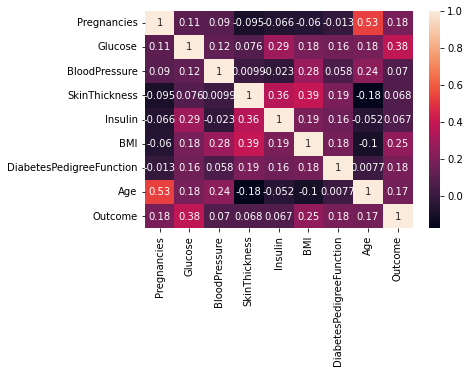

In [15]:
sns.heatmap(data.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,r2_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
x_train, x_test , y_train,y_test = train_test_split(x,y,stratify=y)

In [18]:
scle = StandardScaler()
x_train = scle.fit_transform(x_train)
x_test = scle.fit_transform(x_test)

In [19]:
def scoreChek(model):
    y_pred = model.predict(x_test)
    y_pred = pd.DataFrame(y_pred)[0].apply(lambda x :0 if x<=0.5 else 1)
    print("Train Score", model.score(x_train,y_train))
    print("Test Score",model.score(x_test,y_test))
    print(classification_report(y_test,y_pred))

In [20]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
scoreChek(model)
# Model is overfit

Train Score 1.0
Test Score 0.6859504132231405
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        60
           1       0.72      0.62      0.67        61

    accuracy                           0.69       121
   macro avg       0.69      0.69      0.68       121
weighted avg       0.69      0.69      0.68       121



In [21]:
train_scores =[]
test_scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(i,leaf_size=10)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

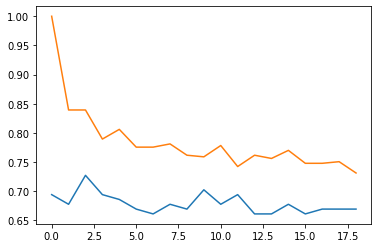

In [22]:
plt.plot(test_scores)
plt.plot(train_scores)

In [23]:
knn = KNeighborsClassifier(6)
knn.fit(x_train,y_train)
train_scores.append(knn.score(x_train,y_train))
test_scores.append(knn.score(x_test,y_test))
scoreChek(knn)

Train Score 0.775623268698061
Test Score 0.6694214876033058
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        60
           1       0.72      0.56      0.63        61

    accuracy                           0.67       121
   macro avg       0.68      0.67      0.67       121
weighted avg       0.68      0.67      0.67       121



In [24]:
from sklearn.svm import SVC
svc = SVC(C=4.0)
svc.fit(x_train,y_train)
train_scores.append(svc.score(x_train,y_train))
test_scores.append(svc.score(x_test,y_test))
scoreChek(svc)

Train Score 0.8614958448753463
Test Score 0.743801652892562
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        60
           1       0.75      0.74      0.74        61

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.74       121
weighted avg       0.74      0.74      0.74       121

